In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re



In [ ]:
Provider=pd.read_csv("/content/drive/MyDrive/Train-1542865627584.csv")
Provider.head(10)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
8,PRV51013,No
9,PRV51014,No


In [ ]:
Beneficiary=pd.read_csv("/content/drive/MyDrive/Train_Beneficiarydata-1542865627584.csv")
Beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [ ]:
Inpatient=pd.read_csv("/content/drive/MyDrive/Train_Inpatientdata-1542865627584.csv")
Inpatient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [ ]:
Inpatient['Is_admitted']=1
# This new feature is created to differentiate Inpatient and outpatient dataframe in merged dataframe.

In [ ]:
Inpatient['AdmissionDt']=pd.to_datetime(Inpatient['AdmissionDt'])
Inpatient['DischargeDt']=pd.to_datetime(Inpatient['DischargeDt'])


In [ ]:
Inpatient['No_of_days_admitted']=(Inpatient['DischargeDt']-Inpatient['AdmissionDt']).dt.days
# A new feature is created from existing feature

In [ ]:
Outpatient=pd.read_csv("/content/drive/MyDrive/Train_Outpatientdata-1542865627584.csv")
Outpatient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
Outpatient['Is_admitted']=0
Outpatient['No_of_days_admitted']=0

### Now all the 4 tables will be merged in order to get global view 

In [ ]:
columns=[col for col in Inpatient.columns if col in Outpatient.columns]
print(columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Is_admitted', 'No_of_days_admitted']


In [ ]:
Inpatient_Outpatient=pd.merge(Inpatient,Outpatient,how='outer',on=columns)
Inpatient_Outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Is_admitted,No_of_days_admitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
Bene=pd.merge(Inpatient_Outpatient,Beneficiary,on='BeneID')
Bene

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaT,...,1,1,2,2,1,1,5000,1068,250,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,...,1,1,2,2,1,2,0,0,5470,1870
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,...,1,1,2,2,1,2,0,0,5470,1870
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,...,1,1,2,2,1,2,0,0,5470,1870
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,...,1,1,2,2,1,2,0,0,5470,1870


In [ ]:
final_df=pd.merge(Bene,Provider,on='Provider')
final_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,27000,2136,450,160,Yes


In [ ]:
final_df['AttendingPhysician'].value_counts()
#As PHY330576 mode is high I will use this to impute missing values in column.

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY385307       1
PHY321355       1
PHY388480       1
PHY399383       1
PHY392440       1
Name: AttendingPhysician, Length: 82063, dtype: int64

In [ ]:
final_df['AttendingPhysician'].fillna('PHY330576',inplace=True)

In [ ]:
def find_number(text):
    num =re.findall(r'[0-9]+',text)
    return " ".join(num)

In [ ]:
final_df['BenID']=final_df['BeneID'].apply(lambda x: find_number(x))
final_df['claimID']=final_df['ClaimID'].apply(lambda x: find_number(x))
final_df['provider']=final_df['Provider'].apply(lambda x: find_number(x))
final_df['Attendingphysician']=final_df['AttendingPhysician'].apply(lambda x: find_number(x))
#Extracting numeral from the features  to make it an int feat

In [ ]:
column=['BenID','claimID','provider','Attendingphysician']
final_df[column]=final_df[column].astype('int')

In [ ]:
final_df['ClaimEndDt']=pd.to_datetime(final_df['ClaimEndDt'])
final_df['ClaimStartDt']=pd.to_datetime(final_df['ClaimStartDt'])

In [ ]:
final_df['Claim_Duration']=(final_df['ClaimEndDt']-final_df['ClaimStartDt']).dt.days

In [ ]:
final_df['DOB']=pd.to_datetime(final_df['DOB'])
final_df['DOD']=pd.to_datetime(final_df['DOD'])

In [ ]:
final_df['DOD'].unique()
#I'll be adding a new feature Age so as there are 554080 missing values in DOD col 
#so for imputation I'll we take the last date in the DOD col.

array([                          'NaT', '2009-11-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-06-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2009-08-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
final_df['DOD'].fillna('2009-12-01',inplace=True)

In [ ]:
final_df['DOD'].isnull().sum()

0

In [ ]:
# A new feature is constructed from existing feature
final_df['Age']=((final_df['DOD']-final_df['DOB']).dt.days/365).astype('int')
final_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,BenID,claimID,provider,Attendingphysician,Claim_Duration,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,3204,60,70,Yes,11001,46614,55912,390922,6,66
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,2136,450,200,Yes,16973,565430,55912,365867,0,77
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1068,100,20,Yes,17521,34721,55912,349293,12,96
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1068,1050,540,Yes,21718,72336,55912,334706,18,87
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,2136,450,160,Yes,22934,73394,55912,390614,4,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,...,0,890,120,No,154147,394122,54050,317497,2,84
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaT,...,0,4400,220,No,154687,184358,54302,376238,0,82
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaT,...,0,14240,2810,No,157378,460770,51577,338096,20,63
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaT,...,0,640,350,No,158295,306999,53083,416646,0,85


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558211 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

In [ ]:
final_df.drop(columns=['BeneID','ClaimID','Provider','AttendingPhysician','OperatingPhysician','OtherPhysician',\
                       'AdmissionDt','DischargeDt','ClaimEndDt','ClaimStartDt','DOB','DOD',\
                       'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',\
                       'ClmProcedureCode_6','ClmAdmitDiagnosisCode','DiagnosisGroupCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2',\
                       'ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',\
                       'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],inplace=True)
# Removing columns with almost null values

In [ ]:
final_df['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [ ]:
final_df['RenalDiseaseIndicator'].replace('Y','1',inplace=True)

In [ ]:
final_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,\
                  'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,\
                  'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,\
                  'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 ,'Gender':2}, 0,inplace=True)

# Feature  Engineering:

In [ ]:
final_df['DeductibleAmtPaid'].median(skipna=True)
#As median value is 0 I'll use this value for imputation.

0.0

In [ ]:
final_df['DeductibleAmtPaid'].fillna(0,inplace=True)

# Class label distribution

In [ ]:
final_df['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [ ]:
Non_fraud=round(((final_df['PotentialFraud'].value_counts()[0])/(final_df['PotentialFraud'].value_counts()[0]+final_df['PotentialFraud'].value_counts()[1]))*100,2)
Fraud=round(((final_df['PotentialFraud'].value_counts()[1])/(final_df['PotentialFraud'].value_counts()[0]+final_df['PotentialFraud'].value_counts()[1]))*100,2)

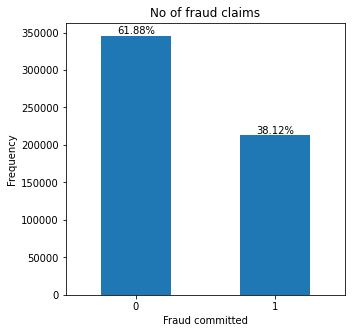

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['PotentialFraud'].value_counts().plot(kind='bar',rot=0)
plt.title("No of fraud claims")
plt.xlabel("Fraud committed")
plt.ylabel("Frequency")
lst=[Non_fraud,Fraud]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

#Observation
There isn't much difference between distribution of Fraud and Non-Fraud class labels.

# Analysis of Age feature

<AxesSubplot:xlabel='Age', ylabel='Count'>

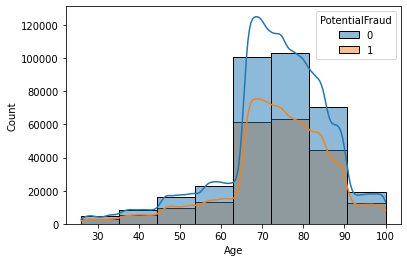

In [ ]:
sns.histplot(x=final_df['Age'],hue=final_df['PotentialFraud'],kde=True,bins=8)

#Observation
Most people who committed fraud lie between age g.p 61-81.

# Analysis of Gender feature

In [ ]:
female_fraud=final_df[((final_df['Gender']==0) & (final_df['PotentialFraud']==1))]
Male_fraud=final_df[((final_df['Gender']==1) & (final_df['PotentialFraud']==1))]


In [ ]:
female=female_fraud['Gender'].value_counts()[0]
male=Male_fraud['Gender'].value_counts()[1]

<AxesSubplot:title={'center':'No of fraud claims'}, xlabel='Genderwise fraud claims', ylabel='Frequency'>

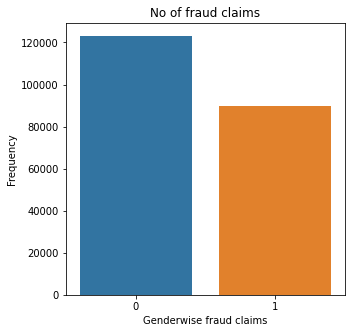

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title("No of fraud claims")
plt.xlabel("Genderwise fraud claims")
plt.ylabel("Frequency")
sns.barplot(x=[0,1],y=[female,male])

# Observation
As we can see from the plot that fraud committed by females is more than males.

# Analysis of Race feature

In [ ]:
final_df['Race'].value_counts()

1    471036
2     55640
3     19715
5     11820
Name: Race, dtype: int64

In [ ]:
Race_1=final_df[((final_df['Race']==1) & (final_df['PotentialFraud']==1))]
Race_2=final_df[((final_df['Race']==2) & (final_df['PotentialFraud']==1))]
Race_3=final_df[((final_df['Race']==3) & (final_df['PotentialFraud']==1))]
Race_4=final_df[((final_df['Race']==5) & (final_df['PotentialFraud']==1))]

In [ ]:
R1_fraud=Race_1['Race'].value_counts()[1]
R2_fraud=Race_2['Race'].value_counts()[2]
R3_fraud=Race_3['Race'].value_counts()[3]
R4_fraud=Race_4['Race'].value_counts()[5]

<AxesSubplot:title={'center':'No of fraud claims'}, xlabel='Racewise fraud claims', ylabel='Frequency'>

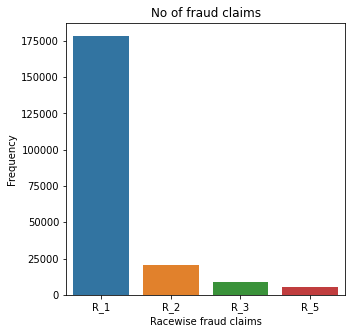

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title("No of fraud claims")
plt.xlabel("Racewise fraud claims")
plt.ylabel("Frequency")
sns.barplot(x=['R_1','R_2','R_3','R_5'],y=[R1_fraud,R2_fraud,R3_fraud,R4_fraud])

# Observation
 1.Race 4 is absent in the dataset.

 2.Race 1 has done more fraud than any other race.

# Analysis of RenalDiseaseIndicator

In [ ]:
final_df['RenalDiseaseIndicator']=final_df['RenalDiseaseIndicator'].astype('int')

In [ ]:
rdn=final_df[((final_df['RenalDiseaseIndicator']==0) & (final_df['PotentialFraud']==1))]
rdy=final_df[((final_df['RenalDiseaseIndicator']==1) & (final_df['PotentialFraud']==1))]

In [ ]:
No=rdn['RenalDiseaseIndicator'].value_counts()[0]
Yes=rdy['RenalDiseaseIndicator'].value_counts()[1]

<AxesSubplot:title={'center':'No of fraud claims'}, xlabel='Renal Disease Indicator', ylabel='Frequency'>

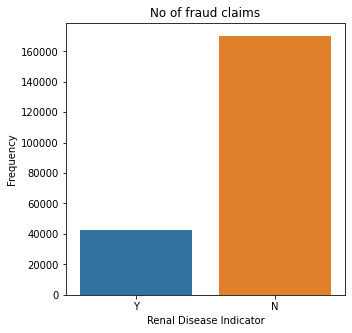

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title("No of fraud claims")
plt.xlabel("Renal Disease Indicator")
plt.ylabel("Frequency")
sns.barplot(x=['Y','N'],y=[Yes,No])

# Observation
1.Very few people have  symptoms related to kidney disease who made fraud claims.

<AxesSubplot:title={'center':'Statewise beneficiary distribution'}, xlabel='State', ylabel='Beneficiary'>

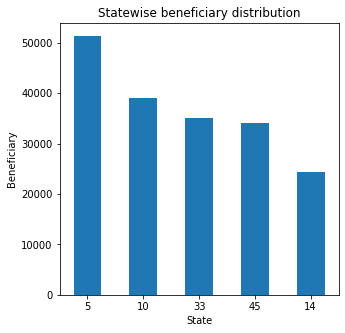

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title('Statewise beneficiary distribution')
plt.xlabel('State')
plt.ylabel('Beneficiary')
final_df['State'].value_counts()[:5].plot(kind='bar',rot=0)

#Observation
Most beneficiaries comes from state 5.

In [ ]:
state_5=final_df[(final_df['State']==5) & (final_df['PotentialFraud']==1)]
state_10=final_df[(final_df['State']==10) & (final_df['PotentialFraud']==1)]
state_33=final_df[(final_df['State']==33) & (final_df['PotentialFraud']==1)]
state_45=final_df[(final_df['State']==45) & (final_df['PotentialFraud']==1)]
state_14=final_df[(final_df['State']==14) & (final_df['PotentialFraud']==1)]


In [ ]:
state_5_fraud=state_5['State'].value_counts()[5]
state_10_fraud=state_10['State'].value_counts()[10]
state_33_fraud=state_33['State'].value_counts()[33]
state_45_fraud=state_45['State'].value_counts()[45]
state_14_fraud=state_14['State'].value_counts()[14]

<AxesSubplot:title={'center':'Statewise beneficiary fraud claims'}, xlabel='State', ylabel='Beneficiary'>

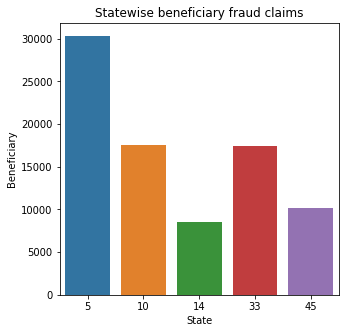

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title('Statewise beneficiary fraud claims')
plt.xlabel('State')
plt.ylabel('Beneficiary')
sns.barplot(x=[5,10,33,45,14],y=[state_5_fraud,state_10_fraud,state_33_fraud,state_45_fraud,state_14_fraud])

# Observation
Most beneficiaries who have made fraud claims are from State code 5.

In [ ]:
final_df['County'].value_counts()[:5]

200    15957
10     13982
20     12632
470    12278
60     11995
Name: County, dtype: int64

In [ ]:
C_200=final_df[(final_df['County']==200)& (final_df['PotentialFraud']==1)]
C_10=final_df[(final_df['County']==10)& (final_df['PotentialFraud']==1)]
C_20=final_df[(final_df['County']==20)& (final_df['PotentialFraud']==1)]
C_470=final_df[(final_df['County']==470)& (final_df['PotentialFraud']==1)]
C_60=final_df[(final_df['County']==60)& (final_df['PotentialFraud']==1)]

In [ ]:
C_200_Fraud=C_200['County'].value_counts()[200]
C_10_Fraud=C_10['County'].value_counts()[10]
C_20_Fraud=C_20['County'].value_counts()[20]
C_470_Fraud=C_470['County'].value_counts()[470]
C_60_Fraud=C_60['County'].value_counts()[60]

<AxesSubplot:title={'center':'Countrywise beneficiary fraud claims'}, xlabel='Country', ylabel='Beneficiary'>

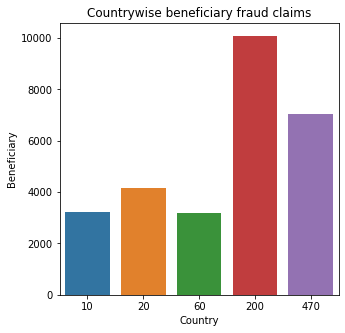

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.title('Countrywise beneficiary fraud claims')
plt.xlabel('Country')
plt.ylabel('Beneficiary')
sns.barplot(x=[200,10,20,470,60],y=[C_200_Fraud,C_10_Fraud,C_20_Fraud,C_470_Fraud,C_60_Fraud])

# Observation
Most beneficiaries who have made fraud claims belongs to Country code 200.

In [ ]:
final_df['NoOfMonths_PartACov'].value_counts()

12    554722
0       2971
6        116
8        100
11        81
4         55
7         44
10        34
5         30
2         16
3         16
9         13
1         13
Name: NoOfMonths_PartACov, dtype: int64

<AxesSubplot:>

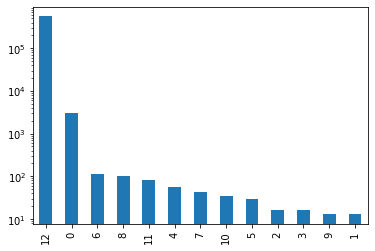

In [ ]:
final_df['NoOfMonths_PartACov'].value_counts().plot(kind='bar',logy=True)

# Observation
Most of the beneficiaries are covered for 12 months of partA insurance.


In [ ]:
(len(final_df[(final_df['NoOfMonths_PartACov']==12)& (final_df['PotentialFraud']==1)]))*100/len(final_df)

37.90484243413333

# Observation
38% of tot beneficiaries who are covered for 12 months of partA insurance have made fraud claims.

In [ ]:
final_df['NoOfMonths_PartBCov'].value_counts().plot(kind='bar',logy=True)

# Observation
Most of the beneficiaries are covered for 12 months of partB insurance.

In [ ]:
(len(final_df[(final_df['NoOfMonths_PartBCov']==12)& (final_df['PotentialFraud']==1)]))*100/len(final_df)

37.832826655153696

#Observation
38% of tot beneficiaries who are covered for 12 months of partB insurance have made fraud claims.

#ChronicCond_Alzheimer

In [ ]:
No=(final_df['ChronicCond_Alzheimer'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_Alzheimer'].value_counts()[1])*100/len(final_df)

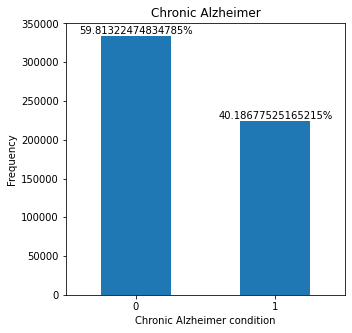

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Alzheimer'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Alzheimer")
plt.xlabel("Chronic Alzheimer condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
40% of beneficiaries have chronic alzheimer condition and 60% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_Alzheimer']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_Alzheimer']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_Alzheimer'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_Alzheimer'].value_counts()[1])*100/len(final_df)

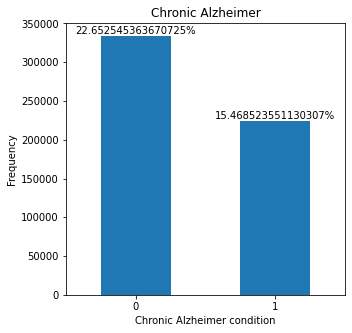

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Alzheimer'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Alzheimer")
plt.xlabel("Chronic Alzheimer condition")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 60% people not  having alzheimer 23% have made fraud claims.
2. Out of 40 % people having alzheimer  15% have made fraud claims.

# ChronicCond_Heartfailure

In [ ]:
No=(final_df['ChronicCond_Heartfailure'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_Heartfailure'].value_counts()[1])*100/len(final_df)

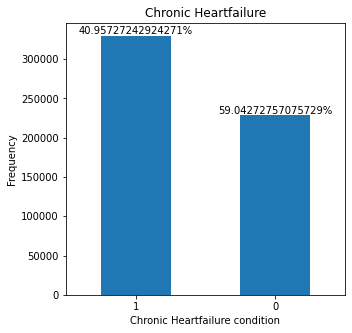

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Heartfailure'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Heartfailure")
plt.xlabel("Chronic Heartfailure condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
41% of beneficiaries have chronic Heartfailure condition and 59% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_Heartfailure']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_Heartfailure']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_Heartfailure'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_Heartfailure'].value_counts()[1])*100/len(final_df)

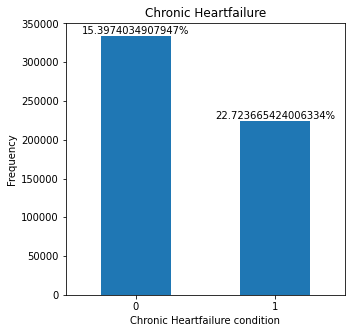

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Alzheimer'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Heartfailure")
plt.xlabel("Chronic Heartfailure condition")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 60% people not having heartfailure condition 15% 
have made fraud claims.

2. Out of 41 % people having heartfailure condition 22.8% have made fraud claims.

# ChronicCond_KidneyDisease

In [ ]:
No=(final_df['ChronicCond_KidneyDisease'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_KidneyDisease'].value_counts()[1])*100/len(final_df)

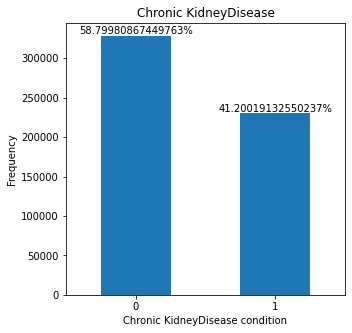

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic KidneyDisease")
plt.xlabel("Chronic KidneyDisease condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
41% of beneficiaries have chronic KidneyDisease condition and 59% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_KidneyDisease']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_KidneyDisease']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_KidneyDisease'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_KidneyDisease'].value_counts()[1])*100/len(final_df)

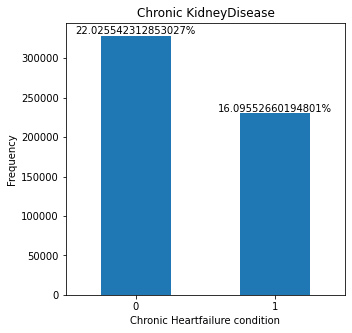

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic KidneyDisease")
plt.xlabel("Chronic Heartfailure condition")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation

1. Out of 59% people not having kidney disease 22% have made fraud claims.
2. Out of 41 % people having KidneyDisease condition 16% have made fraud   claims.

# ChronicCond_Cancer

In [ ]:
No=(final_df['ChronicCond_Cancer'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_Cancer'].value_counts()[1])*100/len(final_df)

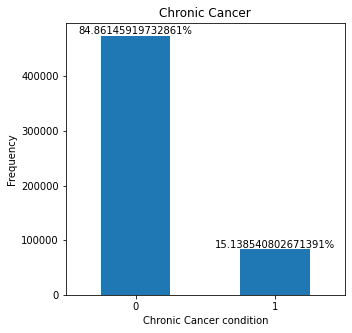

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Cancer'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Cancer")
plt.xlabel("Chronic Cancer condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
15% of beneficiaries have chronic cancer condition and 85% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_Cancer']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_Cancer']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_Cancer'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_Cancer'].value_counts()[1])*100/len(final_df)

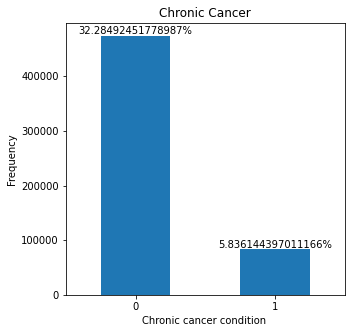

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Cancer'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Cancer")
plt.xlabel("Chronic cancer condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 85% people having cancer condition 32% have made fraud claims.
2. Out of 15 % people having cancer condition 6% have made fraud claims.

# 'ChronicCond_ObstrPulmonary

In [ ]:
No=(final_df['ChronicCond_ObstrPulmonary'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_ObstrPulmonary'].value_counts()[1])*100/len(final_df)

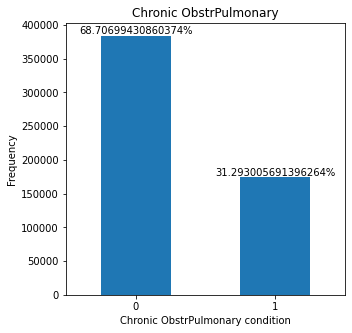

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_ObstrPulmonary'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic ObstrPulmonary")
plt.xlabel("Chronic ObstrPulmonary condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
31% of beneficiaries have chronic ObstrPulmonarycondition and 69% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_ObstrPulmonary']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_ObstrPulmonary']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_ObstrPulmonary'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_ObstrPulmonary'].value_counts()[1])*100/len(final_df)

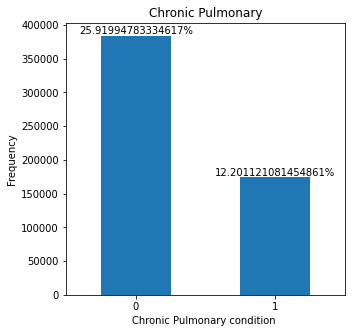

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_ObstrPulmonary'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Pulmonary")
plt.xlabel("Chronic Pulmonary condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 69% people not having chronic pulmonary 26% have made fraud claims.
2. Out of 31% people having chronic pulmonary 12 % of them have made fraud claims

# ChronicCond_Depression

In [ ]:
No=(final_df['ChronicCond_Depression'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_Depression'].value_counts()[1])*100/len(final_df)

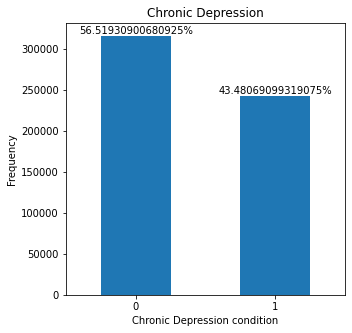

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Depression'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Depression")
plt.xlabel("Chronic Depression condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
43% of beneficiaries have chronic Depression condition and 57% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_Depression']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_Depression']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_Depression'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_Depression'].value_counts()[1])*100/len(final_df)

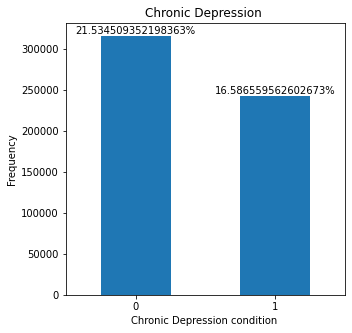

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Depression'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Depression ")
plt.xlabel("Chronic Depression condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 57% people not having depression 22% have made fraud claims.
2. Out of 43 % people having  depression  17% have made fraud claims.

#ChronicCond_Diabetes

In [ ]:
No=(final_df['ChronicCond_Diabetes'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_Diabetes'].value_counts()[1])*100/len(final_df)

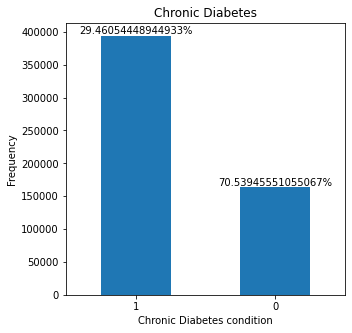

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Diabetes'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Diabetes")
plt.xlabel("Chronic Diabetes condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
29% of beneficiaries have chronic Diabetes condition and 71% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_Diabetes']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_Diabetes']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_Diabetes'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_Diabetes'].value_counts()[1])*100/len(final_df)

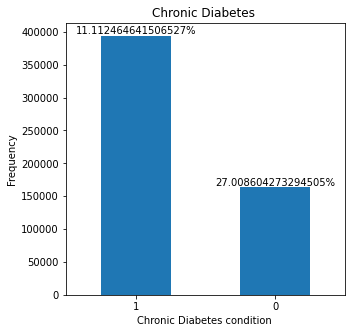

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Diabetes'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Diabetes ")
plt.xlabel("Chronic Diabetes condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 71% people not having diabetes 27% have made fraud claims.
2. Out of 29 % people having  diabetes condition 11% have made fraud claims.

#ChronicCond_IschemicHeart

In [ ]:
No=(final_df['ChronicCond_IschemicHeart'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_IschemicHeart'].value_counts()[1])*100/len(final_df)

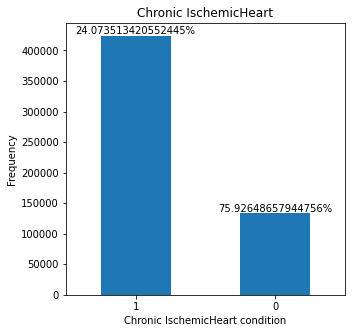

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_IschemicHeart'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic IschemicHeart")
plt.xlabel("Chronic IschemicHeart condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
24% of beneficiaries have chronic IschemicHeart condition and 76% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_IschemicHeart']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_IschemicHeart']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_IschemicHeart'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_IschemicHeart'].value_counts()[1])*100/len(final_df)

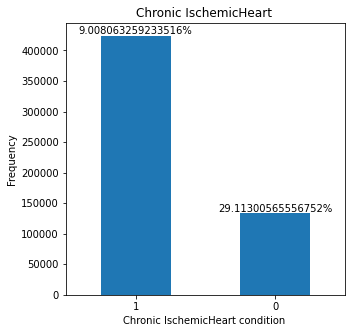

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_IschemicHeart'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic IschemicHeart ")
plt.xlabel("Chronic IschemicHeart condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 76% people not having IschemicHeart condition 29% have made fraud claims.
2. Out of 24 % people having  IschemicHeart condition 9% have made fraud claims.

#ChronicCond_Osteoporasis

In [ ]:
No=(final_df['ChronicCond_Osteoporasis'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_Osteoporasis'].value_counts()[1])*100/len(final_df)

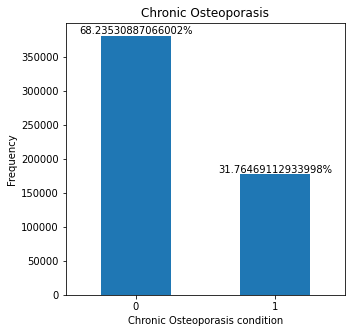

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Osteoporasis'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Osteoporasis")
plt.xlabel("Chronic Osteoporasis condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
32% of beneficiaries have chronic Osteoporasis condition and 68% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_Osteoporasis']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_Osteoporasis']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_Osteoporasis'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_Osteoporasis'].value_counts()[1])*100/len(final_df)

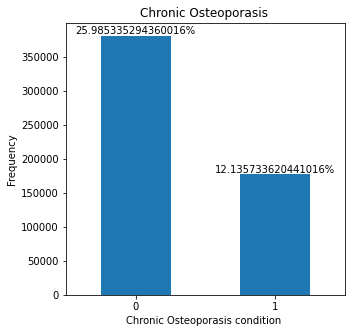

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_Osteoporasis'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic Osteoporasis ")
plt.xlabel("Chronic Osteoporasis condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 68% people not  having Osteoporasis 26%  have made fraud claims.
2. Out of 32 % people having  Osteoporasis 12% have made fraud claims.

# ChronicCond_rheumatoidarthritis

In [ ]:
No=(final_df['ChronicCond_rheumatoidarthritis'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_rheumatoidarthritis'].value_counts()[1])*100/len(final_df)

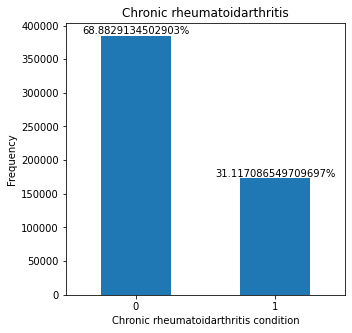

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_rheumatoidarthritis'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic rheumatoidarthritis")
plt.xlabel("Chronic rheumatoidarthritis condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
31% of beneficiaries have chronic rheumatoidarthritis condition and 69% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_rheumatoidarthritis']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_rheumatoidarthritis']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_rheumatoidarthritis'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_rheumatoidarthritis'].value_counts()[1])*100/len(final_df)

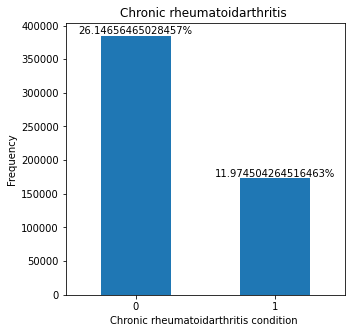

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_rheumatoidarthritis'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic rheumatoidarthritis ")
plt.xlabel("Chronic rheumatoidarthritis condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
1. Out of 69% people not  having rheumatoidarthritis 26% have made fraud claims.
2. Out of 31 % people having  rheumatoidarthritis  12% have made fraud claims.

## ChronicCond_stroke

In [ ]:
No=(final_df['ChronicCond_stroke'].value_counts()[0])*100/len(final_df)
Yes=(final_df['ChronicCond_stroke'].value_counts()[1])*100/len(final_df)

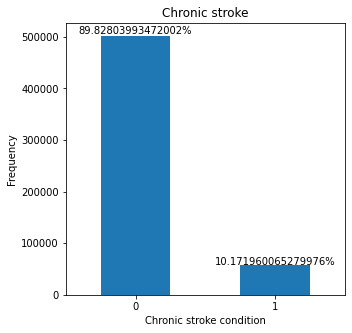

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_stroke'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic stroke")
plt.xlabel("Chronic stroke condition")
plt.ylabel("Frequency")
lst=[No,Yes]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()

# Observation
10% of beneficiaries have chronic stroke condition and 90% of them haven't.

In [ ]:
No=final_df[(final_df['ChronicCond_stroke']==0)& (final_df['PotentialFraud']==1)]
Yes=final_df[(final_df['ChronicCond_stroke']==1)& (final_df['PotentialFraud']==1)]

In [ ]:
fr=(No['ChronicCond_stroke'].value_counts()[0])*100/len(final_df)
N_fr=(Yes['ChronicCond_stroke'].value_counts()[1])*100/len(final_df)

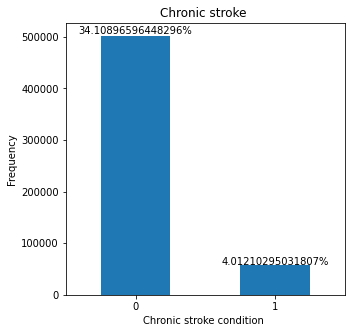

In [ ]:
fig=plt.figure(figsize=(5,5))
color_list=['Red','Orange']
ax=final_df['ChronicCond_stroke'].value_counts().plot(kind='bar',rot=0)
plt.title("Chronic stroke ")
plt.xlabel("Chronic stroke condition ")
plt.ylabel("Frequency")
lst=[fr,N_fr]
i=0
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  plt.text(x+(width/2),y+(height*1.01),str(lst[i])+'%',ha='center')
  i+=1
plt.show()


# Observation
1. Out of 90% people not having stroke 34% have made fraud claims.
2. Out of 10 % people having  stroke  4% have made fraud claims.

In [ ]:
day=final_df[final_df['No_of_days_admitted']!=0]

<AxesSubplot:xlabel='No_of_days_admitted', ylabel='Count'>

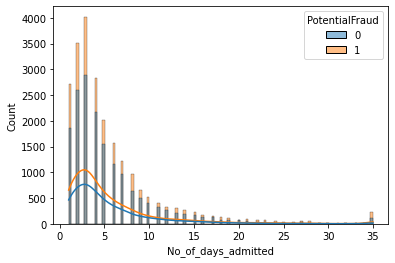

In [ ]:
sns.histplot(x=day['No_of_days_admitted'],hue=final_df['PotentialFraud'],kde=True)

# Observation
1.No of days for which patients was admitted is a right skewed.

2.Patient who was admitted for 3 days has made more fraud claims.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '42721'),
  Text(1, 0, '59303'),
  Text(2, 0, '118316'),
  Text(3, 0, '80977'),
  Text(4, 0, '36330'),
  Text(5, 0, '44241'),
  Text(6, 0, '87248'),
  Text(7, 0, '63544'),
  Text(8, 0, '40202'),
  Text(9, 0, '63504')])

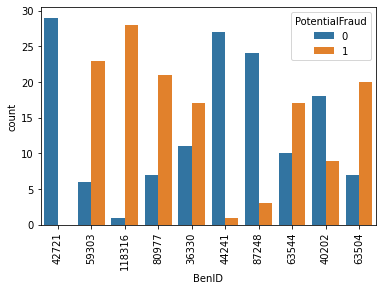

In [187]:
sns.countplot(x=final_df['BenID'],hue=final_df['PotentialFraud'],order=final_df['BenID'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Observation
Beneficiaries associated with  fraud claims are having id 59903,118316,80977,36330,63544,63504

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '51459'),
  Text(1, 0, '53797'),
  Text(2, 0, '51574'),
  Text(3, 0, '53918'),
  Text(4, 0, '54895'),
  Text(5, 0, '55215'),
  Text(6, 0, '52064'),
  Text(7, 0, '56011'),
  Text(8, 0, '55004'),
  Text(9, 0, '57306')])

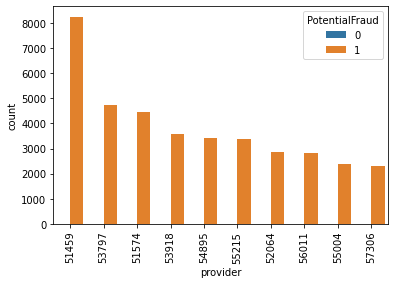

In [188]:
sns.countplot(x=final_df['provider'],hue=final_df['PotentialFraud'],order=final_df['provider'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Observation
Top 10 providers who have made fraud claims are-51459,53797,51574,53918,54895,55215,52064,56011,55004,57306

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '330576'),
  Text(1, 0, '350277'),
  Text(2, 0, '412132'),
  Text(3, 0, '423534'),
  Text(4, 0, '314027'),
  Text(5, 0, '327046'),
  Text(6, 0, '338032'),
  Text(7, 0, '357120'),
  Text(8, 0, '337425'),
  Text(9, 0, '341578')])

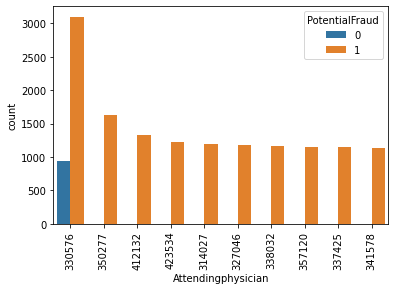

In [189]:
sns.countplot(x=final_df['Attendingphysician'],hue=final_df['PotentialFraud'],order=final_df['Attendingphysician'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Observation
The top 10 Attending physician associated with fraud claims are-330576,350277,412132,423534,314027,327046,338032,357120,337425,341578

# Bivariate analysis

<AxesSubplot:xlabel='InscClaimAmtReimbursed', ylabel='DeductibleAmtPaid'>

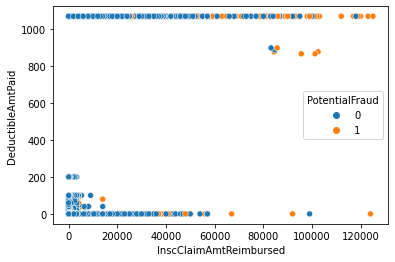

In [191]:
sns.scatterplot(data='final_df',x=final_df['InscClaimAmtReimbursed'],y=final_df['DeductibleAmtPaid'],hue=final_df['PotentialFraud'])

# Observation
We can't differentiate between fraud and non-fraud cases based on InsClaimAmt Reimbursed and DeductibleAmtPaid.

<AxesSubplot:xlabel='IPAnnualReimbursementAmt', ylabel='IPAnnualDeductibleAmt'>

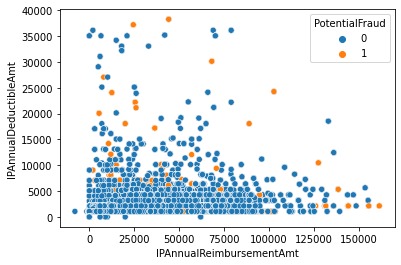

In [192]:
sns.scatterplot(data='final_df',x=final_df['IPAnnualReimbursementAmt'],y=final_df['IPAnnualDeductibleAmt'],hue=final_df['PotentialFraud'])

# Observation
We can see that IPAnnualReimbursementAmt and IPAnnualDeductibleAmt are not able to differentiate between fraud and non-fraud cases.

<AxesSubplot:xlabel='OPAnnualReimbursementAmt', ylabel='OPAnnualDeductibleAmt'>

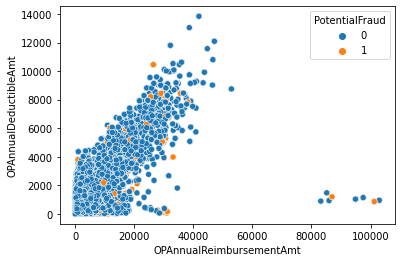

In [193]:
sns.scatterplot(data='final_df',x=final_df['OPAnnualReimbursementAmt'],y=final_df['OPAnnualDeductibleAmt'],hue=final_df['PotentialFraud'])

# Observation
We can see that OPAnnualReimbursementAmt and OPAnnualDeductibleAmt are not able to differentiate between fraud and non-fraud cases.

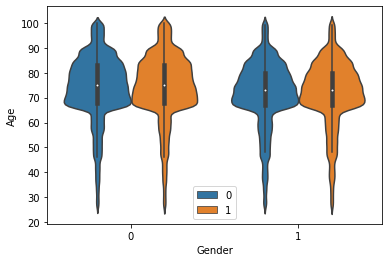

In [194]:
sns.violinplot(data=final_df,x=final_df['Gender'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across male and female for fraud and non-fraud claims doesn't  show  much variation.

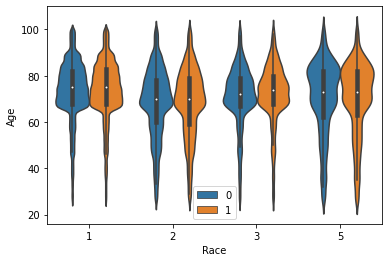

In [195]:
sns.violinplot(data=final_df,x=final_df['Race'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across different races  for fraud and non-fraud claims doesn't  show  much variation.

Text(0, 0.5, 'Insurance Claim Amout Reimbursed')

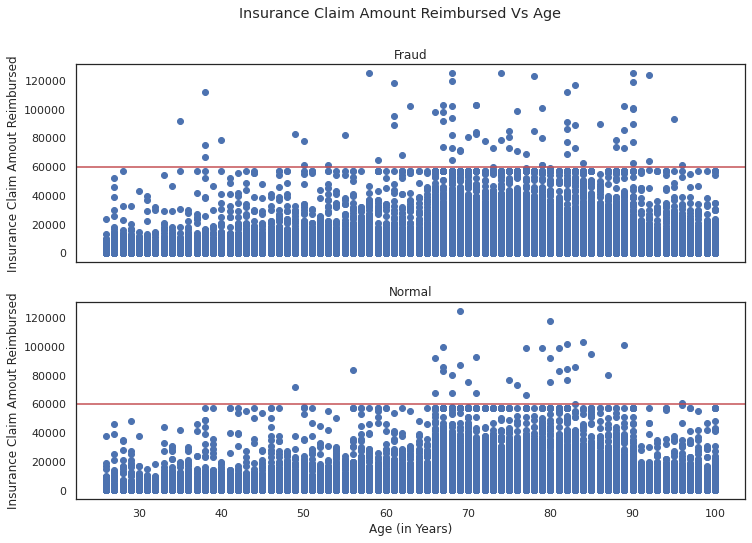

In [197]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2)=plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(final_df[final_df.PotentialFraud==1].Age, 
            final_df[final_df.PotentialFraud==1].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(final_df[final_df.PotentialFraud==0].Age, 
            final_df[final_df.PotentialFraud==0].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.set_xlabel('Age (in Years)')
ax2.axhline(y=60000,c='r')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

# Observation   
Occurence of fraud cases is more frequent in people  aged between 65-85 yrs.   

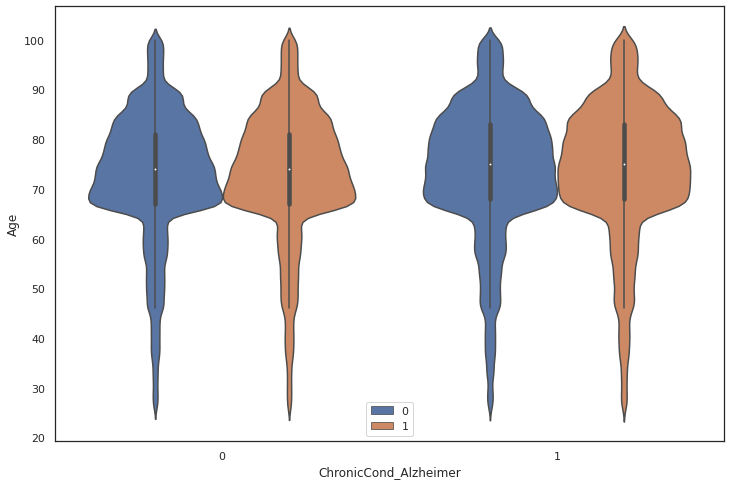

In [198]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_Alzheimer'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across chronic_condAlzheimer( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

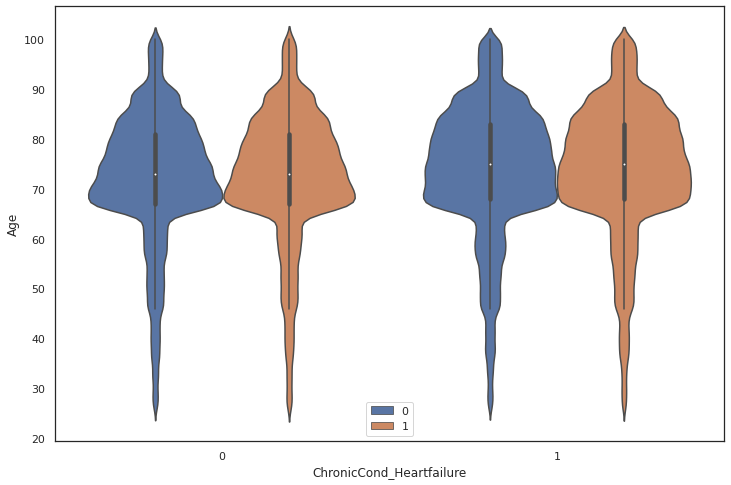

In [199]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_Heartfailure'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across chroniccond_Heartfailure( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

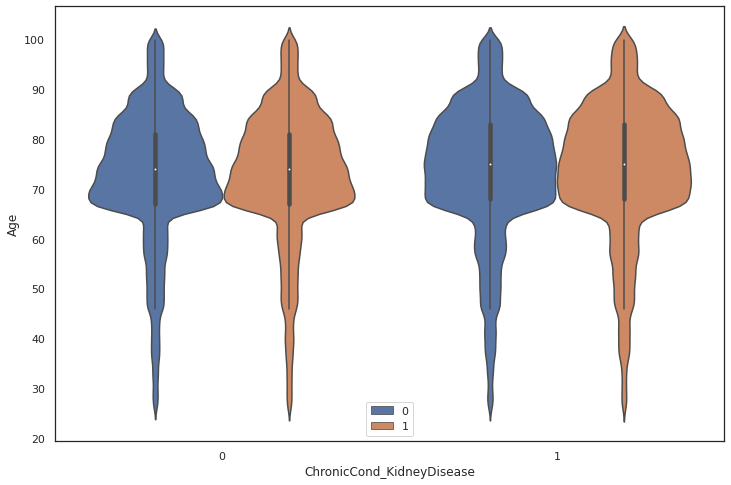

In [200]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_KidneyDisease'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across chroniccond_KidneyDisease( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

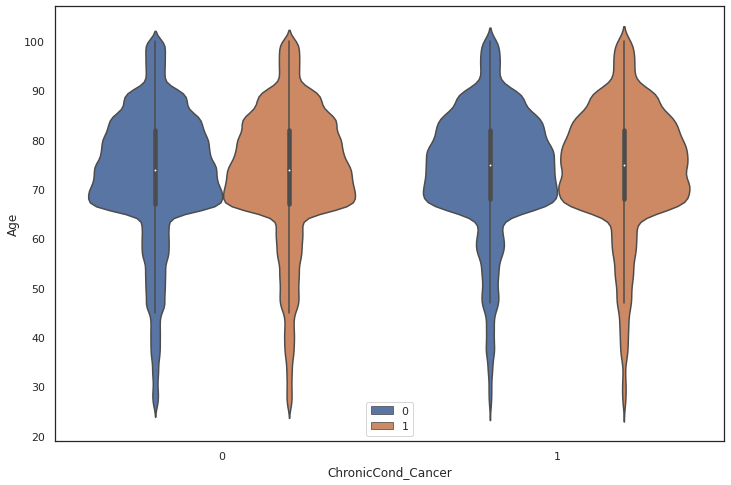

In [201]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_Cancer'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across chroniccond_Cancer( 0 and 1)for fraud and non-fraud claims doesn't show any variation

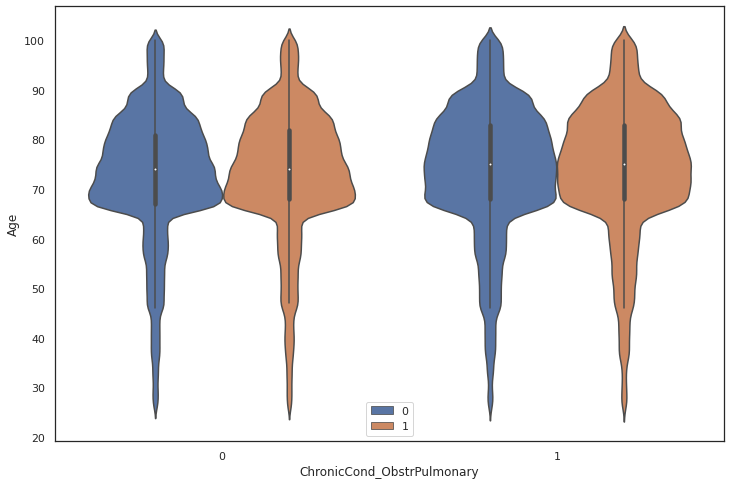

In [202]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_ObstrPulmonary'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_ObstrPulmonary( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

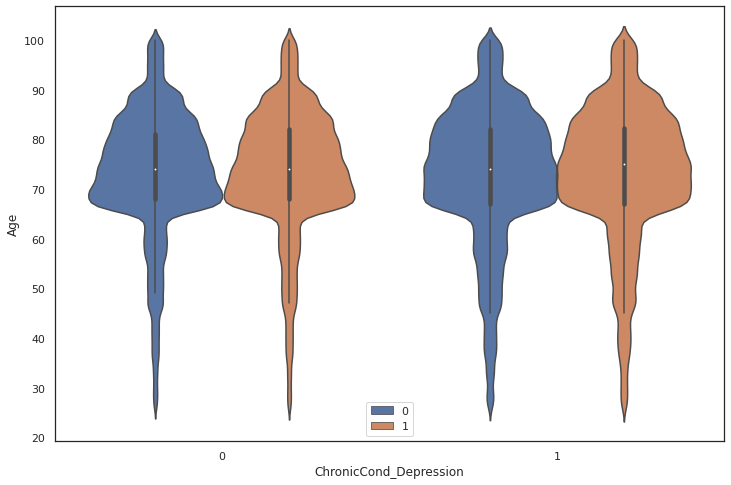

In [203]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_Depression'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_Depression( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

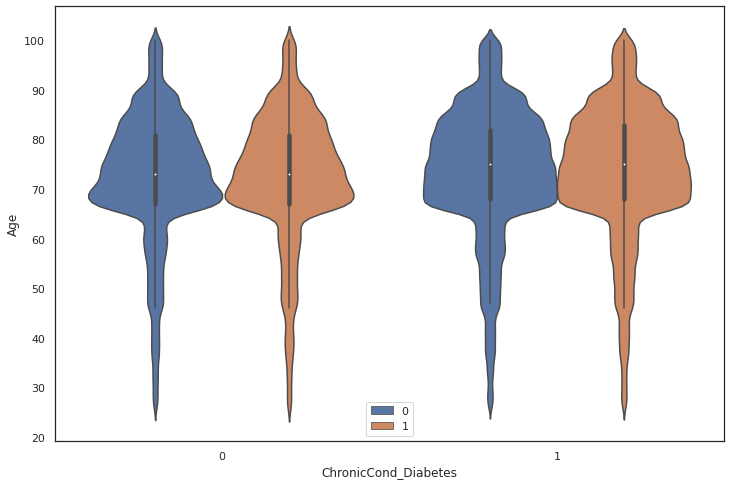

In [204]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_Diabetes'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_Diabetes( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

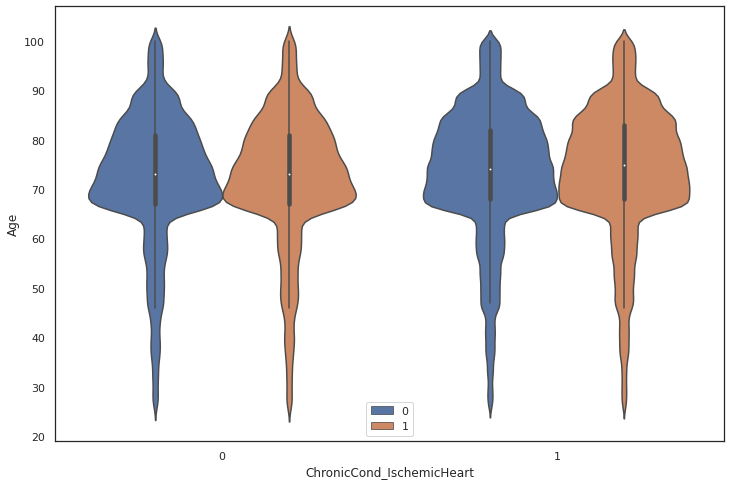

In [205]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_IschemicHeart'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_IschemicHeart( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

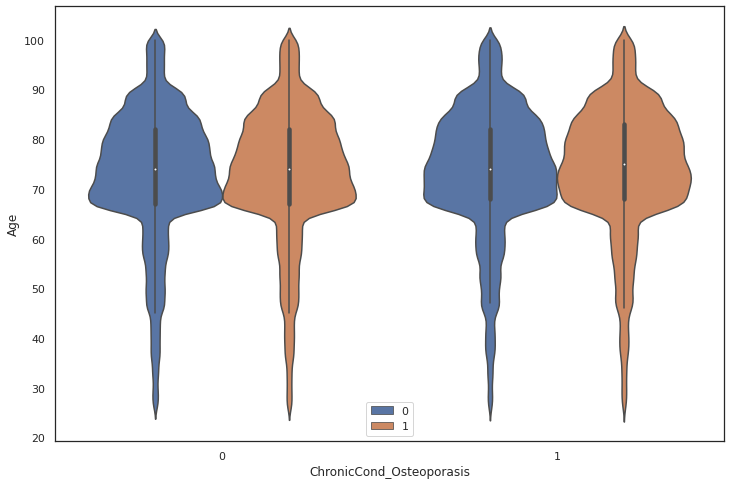

In [206]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_Osteoporasis'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_Osteoporasis( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

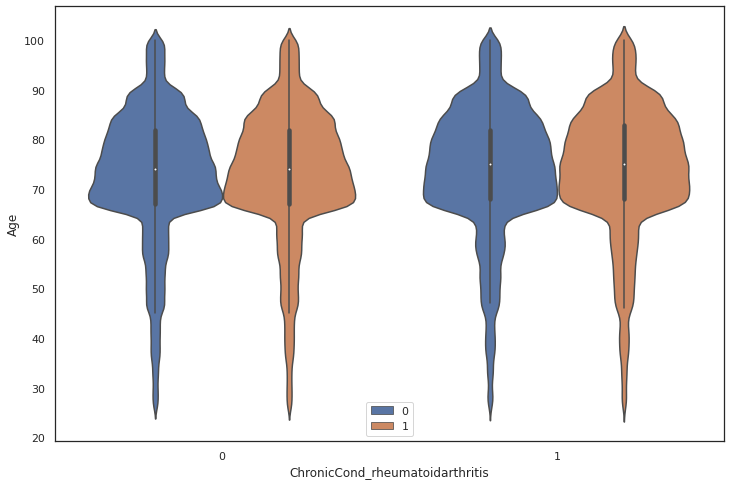

In [207]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_rheumatoidarthritis'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_rheumatoidarthritis( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

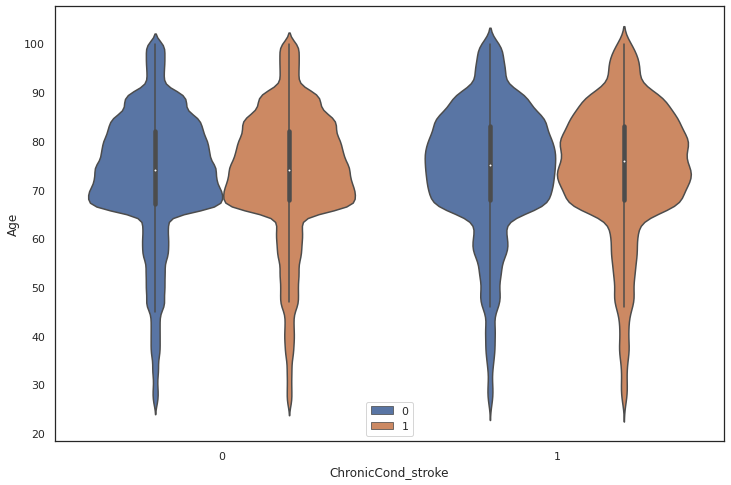

In [208]:
sns.violinplot(data=final_df,x=final_df['ChronicCond_stroke'],y=final_df['Age'],hue=final_df['PotentialFraud'])
plt.legend(loc='lower center')

# Observation
Distribution of Age across ChronicCond_stroke( 0 and 1)for fraud and non-fraud claims doesn't show any variation.

<AxesSubplot:xlabel='Age', ylabel='IPAnnualReimbursementAmt'>

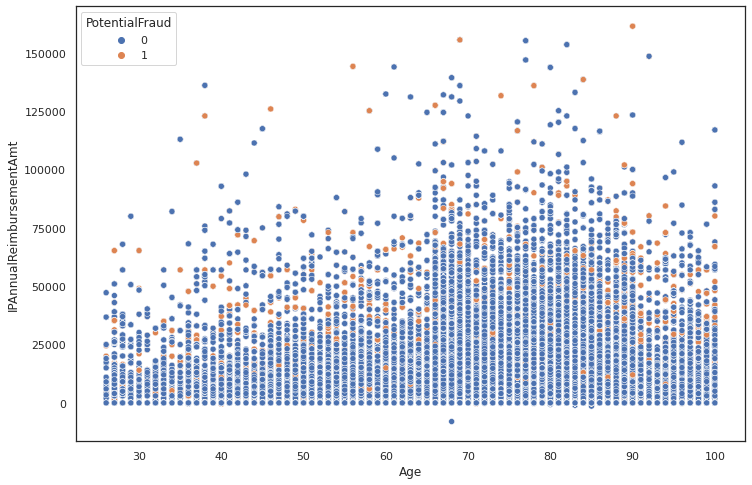

In [209]:
sns.scatterplot(data='final_df',x=final_df['Age'],y=final_df['IPAnnualReimbursementAmt'],hue=final_df['PotentialFraud'])

# Observation
Age and IPAnnualReimbursementAmt isn't able to differentiate fraud and non-fraud claims.

<AxesSubplot:xlabel='Age', ylabel='IPAnnualDeductibleAmt'>

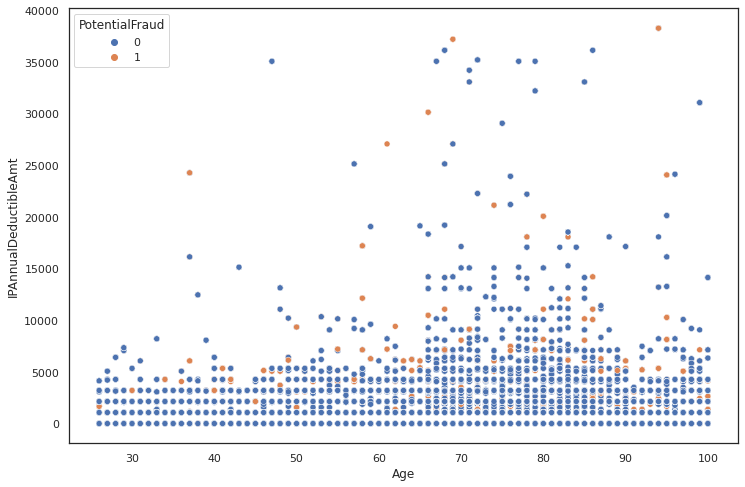

In [210]:
sns.scatterplot(data='final_df',x=final_df['Age'],y=final_df['IPAnnualDeductibleAmt'],hue=final_df['PotentialFraud'])

# Observation
Age and IPAnnualDeductibleAmt isn't able to differentiate fraud and non-fraud claims.

<AxesSubplot:xlabel='Age', ylabel='OPAnnualReimbursementAmt'>

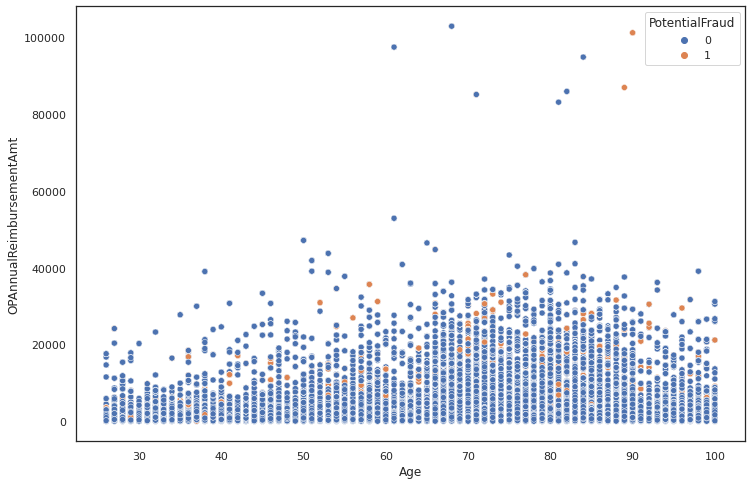

In [211]:
sns.scatterplot(data='final_df',x=final_df['Age'],y=final_df['OPAnnualReimbursementAmt'],hue=final_df['PotentialFraud'])

# Observation
Age and OPAnnualReimbursementAmt isn't able to differentiate fraud and non-fraud claims.

<AxesSubplot:xlabel='Age', ylabel='OPAnnualDeductibleAmt'>

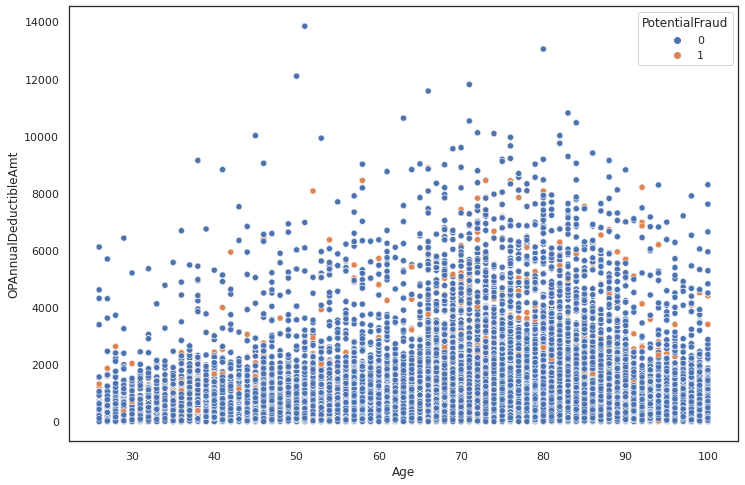

In [212]:
sns.scatterplot(data='final_df',x=final_df['Age'],y=final_df['OPAnnualDeductibleAmt'],hue=final_df['PotentialFraud'])

# Observation
Age and OPAnnualDeductible Amt isn't able to differentiate fraud and non-fraud claims.